<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
07 Introduction to Models. Part 2.
<a class="tocSkip">   
</h1>  

In [3]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats

sns.set(rc={'figure.figsize':(12, 8.5)})
#sns.set()

# Inference in Simple Linear Regression

## Introduction

+ Everything we have done up to this point in this session refers to a **single concrete sample**. That includes the part about goodness of fit: we were considering how the regression line fitted the particular sample from where it came. But since we are trying to do Statistics, we hould now widen our perspective and think in terms of populations and not just individual samples. 


+ Our starting point is the idea that the pattern we have spotted in a sample hints at a pattern when we move up to the population. That *population level pattern* is a *Linear Model*, which again is a mathematical abstraction defined as follows:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\hspace{0.5cm}\textbf{Simple Linear Regression Model.}
\quad\\
\quad\\
\hspace{1cm}Y = \underbrace{\beta_0 + \beta_1 X}_{\text{model}} + 
    \underbrace{\epsilon}_{\text{noise}}
\quad\\
\quad\\
$
}
$$
where $\beta_0, \beta_1$ are the <strong>model coeficients</strong>, while the  <strong>error variables</strong> $\epsilon$ are supposed to be independent (for each value of $X$) and with (conditional on $X$) normal distribution $N(0, \sigma)$. The parameter $\sigma$ is the common or <strong>homogeneous variance</strong> of all these error variables.  
</p> 

+ The **population regression line** $Y = \beta_0 + \beta_1 X$ that appears here, with coefficientes $\beta_0$ and $\beta_1$, is a **theoretical and non observable straight line**. When we havee a sample we can use it to obtain an **empirical regression line** that can be seen as a way to estimate the abstract line by means of the relations:
$$
\quad\\
\beta_0\approx b_0, \qquad \beta_1\approx b_1
\quad\\
$$

+ **Example:** let us run a simulation where we have 5 samples (of size $n = 30$ each) of a population in which we have two random variables related through an abstract linear model  
$$Y = 4 - 2 X + \epsilon_i$$
that is $\beta_0 = 4, \beta_1 = -2$. We also assume that the common variance for the errors is $\sigma^2 = 0.25$. Let us use NumPy to:

    1. Get those samples.
    2. Fit a regression line for each sample
    3. Do a scatterplot of the samples and their corresponding regression lines.
    4. Also add a dashed line representing the theoretical population line.
  
  We will add color to the plot to identify the samples.
  
  Añadimos ruido.
  Cuando b1 es 0, ¿sabiendo el valor de la x, por donde va la y?
    DF0 es 
    fabricamos los x 

           X         Y  sampleId
0   0.247426  3.720089         0
1   0.092990  3.175312         0
2   0.611763  3.152262         0
3   0.060662  4.201127         0
4   0.661033  2.572942         0
5   0.755158  3.335986         0
6   0.110869  4.909033         0
7   0.043056  4.614040         0
8   0.414417  2.689340         0
9   0.988629  1.602858         0
10  0.969199  1.902409         0
11  0.256972  3.434445         0
12  0.558762  3.152250         0
13  0.242348  3.572170         0
14  0.322020  4.031675         0
15  0.891360  1.856626         0
16  0.946114  1.291062         0
17  0.722539  2.990345         0
18  0.928474  2.410531         0
19  0.996087  1.285552         0
20  0.249422  3.851285         0
21  0.062290  3.477294         0
22  0.944790  2.245030         0
23  0.650286  2.888227         0
24  0.321676  3.392490         0
25  0.083364  3.165935         0
26  0.219244  4.475445         0
27  0.084178  3.731900         0
28  0.052139  3.893770         0
29  0.2052

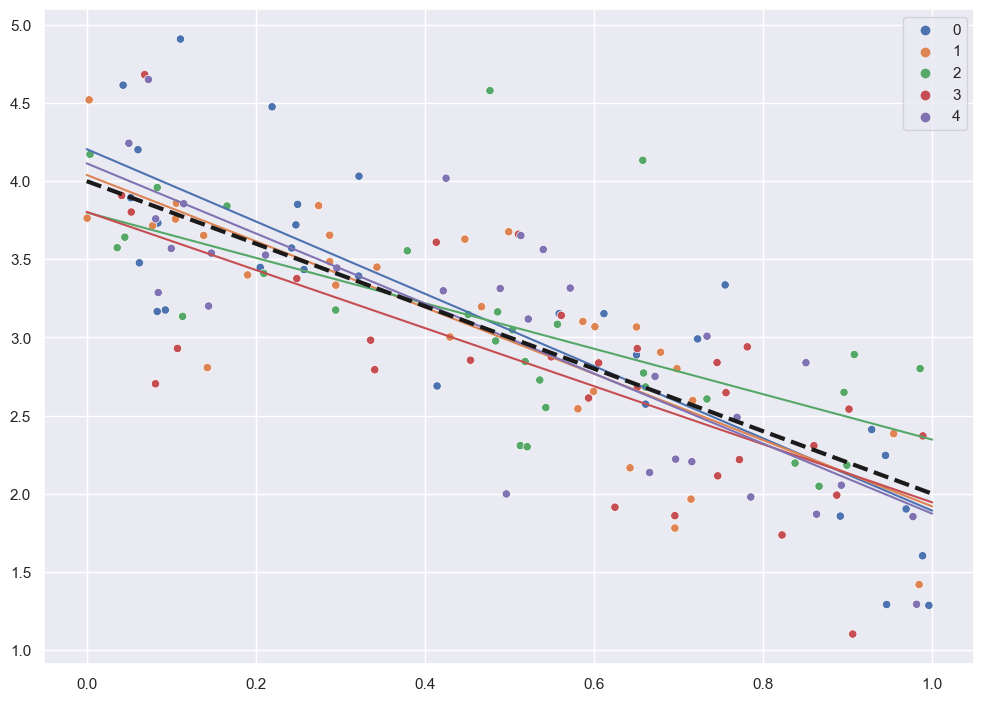

In [4]:
rng = np.random.default_rng(2022)

# Common error variance for the linear model
sigma = 0.5
# Number of samples
N = 5
# Sample size
n = 30
# A column to distinguish the data in each sample from the other samples
sampleId = np.repeat(np.arange(N), n)
# The X part of the samples
X = rng.uniform(size = N * n)
# The error variables
Eps = rng.normal(loc = 0, scale = sigma, size = N * n)
# And the Y part according to the model
beta0 = 4
beta1 = -2
Y = beta0 + beta1 * X + Eps
# Put it all together in a DataFrame
DF = pd.DataFrame({'X': X, 'Y':Y, 'sampleId':sampleId})
print(DF.head(50)) # test the result
# And plot it using color to identify samples
showLegend = True
if(N > 10):
    showLegend = False
sns.scatterplot(data = DF, x = X, y = Y, hue = sampleId, 
                palette="deep", alpha = n/max([n, N]), legend= showLegend)

from sklearn.linear_model import LinearRegression

# This function gets the coefficients for the regression line
# of Y vs X. Both are assumed t be numerical pandas series of the
# same length.
def getLM(X, Y):
    modelXY = LinearRegression(fit_intercept=True)
    X = X.values[:, np.newaxis]
    Y = Y.values
    XY_fit = modelXY.fit(X, Y)
    b1 = XY_fit.coef_[0]
    b0 = XY_fit.intercept_
    return((b0, b1))

# Now let us fit a regression line for each sample and plot the result.
palette2 = iter(sns.color_palette(palette="deep", n_colors=N))

for sample in range(N):
    # select the sample
    DFs = DF.loc[sampleId == sample, :] 
    Xs = DFs.X
    Ys = DFs.Y
    # fit the regression line
    b0, b1 = getLM(Xs,Ys)
    # plot the line
    Xnew = np.linspace(0, 1, num = 100)
    Ynew = b0 + b1 * Xnew
    plt.plot(Xnew, Ynew, color = next(palette2))

Xnew = np.linspace(0, 1, num = 100)
Ynew = beta0 + beta1 * Xnew
plt.plot(Xnew, Ynew, "k--", lw = 3)

plt.show()

cada pendiente qu eobtienes de una muestra es una forma de asomarse a la pendiente de verdad. EN este caso, vemos como cada muestra (Color diferente) genera una recta distinta
## Residual Variance.

+ We need therefore to obtain *estimates* for the theoretical parameters $\beta_0$ and $\beta_1$. In particular we want to compute confidence intervals for these parameters, starting with a sample. Besides, we are also interested in testing the null hypothesis 
$$H_0 = \{\beta_1 = 0\}$$
because this will tell us if the $X$ and $Y$ variable seem to be correlated.

+ As we will see, the key ingredient for all these goals is the following estimate of $\sigma^2$ (recall, the common error variance), called the **residual variace**.  
$$
\hat\sigma^2 = \dfrac{1}{n - 2}\sum_i{e_i^2}
$$

**Notes:**  
  
   1. We use the symbol $\hat\sigma$ instead of $\sigma$ to denote that this is a *sample estimator*. This notation is common in Statistics.
   2. We divide by $n - 2$ for the very same reason we had for the sample variance, to get a *non biased estimator*.  
   3. If you think a little about the model equation and the role that $\sigma$ plays in it, you will com to the conclusion that it makes sense to have an estimate for  $\sigma^2$ depending on the squared residuals, given that their mean is zero.

**Example using Scikit:**
+ We will illustrate the definitions using the code that computes all these values. First we will have a step-by-step approach and then we will see below how to take a faster way and use the `statsmodels` module to get all these results very quickly. In this example we wil use the data from the first sample in the `DF` DataFrame from the previous example (with `sampleId == 0`).

* Let us find the model for the data set

In [5]:
DF0  = DF.loc[sampleId == 0]

In [6]:
model_DF0 = LinearRegression(fit_intercept=True)
X = DF0.X.values[:, np.newaxis]
Y = DF0.Y.values
model_DF0 = LinearRegression(fit_intercept=True)
DF0_fit = model_DF0.fit(X, Y)
print(X)

[[0.24742606]
 [0.09299006]
 [0.61176337]
 [0.06066207]
 [0.66103343]
 [0.75515778]
 [0.1108689 ]
 [0.04305584]
 [0.41441747]
 [0.98862926]
 [0.96919869]
 [0.25697153]
 [0.55876211]
 [0.24234798]
 [0.32202029]
 [0.89135975]
 [0.94611366]
 [0.72253931]
 [0.92847437]
 [0.99608701]
 [0.2494223 ]
 [0.06229007]
 [0.94479027]
 [0.65028587]
 [0.32167568]
 [0.08336384]
 [0.21924361]
 [0.08417791]
 [0.05213927]
 [0.20525022]]


* These are the coefficients (remember they are estimates for $\beta_0, \beta_1$).

In [5]:
b1 = DF0_fit.coef_[0]
b0 = DF0_fit.intercept_
print("b0 = {:.6}, b1 = {:.6}".format(b0, b1))

b0 = 4.20468, b1 = -2.31301


* And we use them to get the residuals

In [6]:
model_DF0_resid = Y - DF0_fit.predict(X)

* Finally we can get the residual variance:

In [7]:
# The sample size
n = len(DF0)
# Uncomment the following line to see that the mean of the residuals is 0
# print(model_DF_resid.mean())
resid_variance = (model_DF0_resid**2).sum() / (n - 2)
print("The residual variance for this data and regression line is {:.6}".format(resid_variance))

The residual variance for this data and regression line is 0.247604


## Confidence Intervals for $\beta_0, \beta_1$.

para calcluar contrastes de hipótesis, 

+ The sample variances of these coefficients are given by:
  $$
  \sigma^2_{b_1} = \dfrac{\sigma^2}{(n- 2)\sigma_X^2},\qquad\qquad
  \sigma^2_{b_0} = \left(\dfrac{1}{n} + \dfrac{\bar X^2}{\sum_{i=1}^n(X_i - \bar X)^2}\right)\left(\dfrac{\sigma^2}{n - 2}\right)
  $$
  But in order to use this in estimation we need to replace $\sigma^2$ with the estimator $\hat\sigma^2$ coming from the residual variance. Then if the linear model hypothesis are met (normality, independence and homogeneous variance of the errors) the following result describes the sampling distribution of $b_i, i = 0, 1$:
$$
\quad\\
\dfrac{b_i - \beta_i}{\hat\sigma^2_{b_i}}\sim t_{n - 2}
\quad\\
$$
a Student's $t$ with $dof = n - 2$. This information leads directly to the following expression for the confidence interval (confidence level $cl = 1 - \alpha$) for the $b_0$ parameter:
$$
\quad\\
\beta_1 = b_1 \pm t_{n-2; \alpha/2}\sqrt{\dfrac{\hat\sigma^2}{\sum_{i=1}^n(X_i - \bar X)^2}}
\quad\\
$$

**Example using Scikit (continued):**
+ Let us get the sample variances and standard errors (their square roots) for the coefficients.

In [8]:
# esto son traducciones literales de las fórmulas, no hay que hacerlo así, hay funciones en statsmodels que hace todos estos cáclulos
b0_variance = resid_variance * (1 / n + X.mean()**2/ ((X - X.mean())**2).sum())
b1_variance = resid_variance / ((n - 1) * X.std(ddof = 1)**2)

b0_se = np.sqrt(b0_variance) 
b1_se = np.sqrt(b1_variance)

print("b0_se = {:.6}".format(b0_se))
print("b1_se = {:.6}".format(b1_se))

b0_se = 0.151532
b1_se = 0.265719


+ We use the $t$ critical value and the expression above to get  a confidence interval for the (population, theoretical) slope $\beta_1$ of the linear regression model. 

In [9]:
alpha = 0.05
talpha = stats.t.isf(alpha / 2, df = n - 2)

CI_beta1 = b1 + np.array([-1, 1]) * talpha * b1_se

print("The confidence interval for the regression model slope is [{:.4}, {:.4}]".format(CI_beta1[0], CI_beta1[1]))


The confidence interval for the regression model slope is [-2.857, -1.769]


+ We could similarly obtain a confidence interval for the intercept $\beta_0$ of the linear regression model. But we will see next a faster way to do hat, so we stop at this point.

## Inference results using `statsmodels`
Hace inferencia estadística de manual.

+ We could go on like this using `Scikit` objects to extract the information we want from the regression model. But for many of the classical Statistical models (such as linear regression)  the module `statsmodels` offers an easier alternative for a task like our present one. Do not think of `statsmodels` as an alternative to `scikit-learn`, because the latter is centered around Machine Learning and offers tools and models that are simply not considered in `statsmodels`. If anything, `statsmodels` can be considered an extension of the statistical capacities of `scipy.stats` 

**Example using `statsmodels` (continued from the previous one):**

+ Make sure that `statsmodels` is installed to your `fmad` environment (run `conda install --name fmad statsmodels` in the console if needed). The we create the regression model object like this:

In [10]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

In [11]:
X_1 = sm.add_constant(X) # para añadir una constante en la matriz para que a la hora de multiplicar no se modifique.
model_DF0 = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares, 
print(X.shape)
print(X_1.shape)
print(X_1)

(30, 1)
(30, 2)
[[1.         0.24742606]
 [1.         0.09299006]
 [1.         0.61176337]
 [1.         0.06066207]
 [1.         0.66103343]
 [1.         0.75515778]
 [1.         0.1108689 ]
 [1.         0.04305584]
 [1.         0.41441747]
 [1.         0.98862926]
 [1.         0.96919869]
 [1.         0.25697153]
 [1.         0.55876211]
 [1.         0.24234798]
 [1.         0.32202029]
 [1.         0.89135975]
 [1.         0.94611366]
 [1.         0.72253931]
 [1.         0.92847437]
 [1.         0.99608701]
 [1.         0.2494223 ]
 [1.         0.06229007]
 [1.         0.94479027]
 [1.         0.65028587]
 [1.         0.32167568]
 [1.         0.08336384]
 [1.         0.21924361]
 [1.         0.08417791]
 [1.         0.05213927]
 [1.         0.20525022]]


+ Now we fit that model:

In [12]:
DF0_fit = model_DF0.fit() # ajustar el modelo

+ And now for the fun part. We can ask `statsmodels` to provide us with a summary of the properties of this fit, much like the output of the R `summary` function:

In [13]:
DF0_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     75.77
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.87e-09
Time:                        18:38:16   Log-Likelihood:                -20.594
No. Observations:                  30   AIC:                             45.19
Df Residuals:                      28   BIC:                             47.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2047      0.152     27.748      0.000       3.894       4.515
x1            -2.3130      0.266     -8.705      0.000      -2.857      -1.769
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.662
Skew:                           0.103   Prob(JB):                        0.718
Kurtosis:                       2.302   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

la columna coef nos da la recta de regresión. (4.2-2.31x)

p-valor[prob(f-statistic)] h0{b1=0} La hipotesis nula dice que b_1 = 0, es decir, que es horizontal, no hay correlación. Como el pvalor es pequeño, rechazamos la hipotesis nula, podemos decir que hay correlación entre X e Y

Rsquared es el coeficiente de correlación
+ The above table contains (along with many others) the results that we previously and painstakingly worked out step by step. For example, the **std err** for the **Intercept** and **X** contain the standard errors for $b_0$ and $b_1$, and you can check that they agree with our previous results. Also, the **[0.025	0.975]** section of the table displays confidence intervals for $\beta_0$ and $\beta_1$, this last one again in agreement with our previous computation. 

+ Having this kind of table is nice, but sometimes we will want to use some of the results it contains in a computation downstream. It is quite convenient therefore that `statsmodels` offers a way to access the relevant components of the table directly. For example, to get the standard error for the $b_i$:

In [14]:
DF0_fit.bse

array([0.15153215, 0.26571891])

+ The model coefficients themselves are:

In [15]:
DF0_fit.params

array([ 4.20467907, -2.31300628])

In [16]:
DF0_fit.conf_int(alpha=0.05)

array([[ 3.89427953,  4.51507861],
       [-2.8573068 , -1.76870576]])

+ The Pearson correlation coefficient $R^2$ is:

In [17]:
DF0_fit.rsquared # coeficiente de correlación

0.730177668901771

+ And you can check [this page in the `statsmodels` documentation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html) to see all the available results.

+ **Exercise (S07-004)**  Using the three samples contained in these files (we already used them before):   

   + [./data/07_simple_linear_regression_01.csv](./data/07_simple_linear_regression_01.csv)  
   + [./data/07_simple_linear_regression_02.csv](./data/07_simple_linear_regression_02.csv) 
   + [./data/07_simple_linear_regression_03.csv](./data/07_simple_linear_regression_03.csv)  
  Find for each sample:  
    (a) The coefficients of the linear regression line (this time, use `statsmodels` and compare with our previous `scikit` results).  
    (b) Confidence intervals for those coefficients.  
    (c) The Pearson's $R^2$.  



In [18]:
D01 = pd.read_csv("./data/07_simple_linear_regression_03.csv")
D01.head()

,X,Y
0,0.247426,1.242363
1,0.092990,-1.099547
2,0.611763,-1.123237
3,0.060662,3.385741
4,0.661033,1.728117


In [19]:
# calculamos el modelo de regresión lineal
X_v = sm.add_constant(D01.X.values)
Y_v = D01.Y.values
model_D01=sm.OLS(Y_v,X_v)
D01_fit = model_D01.fit()
D01_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.796
Date:                Thu, 29 Sep 2022   Prob (F-statistic):              0.183
Time:                        18:38:16   Log-Likelihood:                -199.83
No. Observations:                 100   AIC:                             403.7
Df Residuals:                      98   BIC:                             408.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4239      0.343      1.235      0.220      -0.257       1.105
x1            -0.8084      0.603     -1.340      0.183      -2.006       0.389
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.149
Skew:                           0.021   Prob(JB):                        0.928
Kurtosis:                       2.816   Cond. No.                         4.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Testing the Null $H_0=\{\beta_1 = 0\}$

+ As we said before, *rejecting* this null hypothesis indicates the existence of a correlation between the two variables, and is therefore an important step in assessing the possible (linear) relation between them. 

**Example using `statsmodels` (continued from the previous one):**

+ The output of the `summary` function from `statsmodels` contains the p-value for this test in the `P>|t|	` column of the table (and also the p-value for the intercept-related test with null $H_0=\{\beta_0 = 0\}$, but we do not usually care much about this one). However, you can also access the value directly as follows:

In [20]:
DF0_fit.pvalues

array([6.52161729e-22, 1.87350904e-09])

+ And we can see that in this particular example, as expected from the plot, the p-value is so small that we certainly reject the null and conclude that the data can not support the hypothesis of $\beta_1 = 0$ (similarly for the intercept).

## Confidence and Prediction Bands for $Y$ values.  

+ We have already seen how to obtain confidence intervals for the slope and intercept of the regression line. Now we want to go deeper into what this means for the individual predictions that we made when we took a value $X = x_0$  (which may or may not be in the sample) and plugged it into the regression line, to get its *predicted value* $\hat y_0$. The equation of the linear model 
$$
\quad\\
Y = \beta_0 + \beta_1 X +\epsilon
\quad\\
$$
guarantees that the value $\hat Y_0 = \beta_0 + \beta_1 X_0$  we obtained here is the **conditional mean** $E(Y| X = x_0)$ because we have assumed that the (contitional on $X$) mean of $\epsilon$ is $0$. But since we only have estimates for $\beta_0, \beta_1$ that means that we also have estimates of $\hat Y_0$. And thus, we should be able to provide a confidence interval for $\hat Y_0$. 

+ **Example.** To make sure that you understand this go back to the example where we took 5 samples (of size  𝑛=30  each) from the same population and fitted the regression line for each of those samples. Now think of a fixed value of $X$ (say $X = 0.2$) and look at the predicted values for each of those lines. They are certainly different from one sample to another in most cases. But where do we expect to find the predicted value of $Y$ for that fixed value of $X$. More specifically, keeping the size of the samples ($n = 30$) take a much larger number of samples, like $N = 100$ or $N = 200$. Repeat the plot and look at the region swept by all the regression lines. Now focus again on the specific value of $X$ you chose and look for an interval of $Y$ values assigned to it by all that many the regression lines. That is precisely the interval we are after.

### Confidence Bands

+ If we do the same for every value of $X$ in the range of the sample we get a collection of confidence intervals that together define a **confidence band** for the linear regression based on that sample. This band is precisely the region swept by all the regression lines in the example above.

**Example (continued):** back to the data from the previous example, the following code shows how to get the confidence bands for this example.  We start by creating a family of equally spaced values covering the range of $X$ in the sample. And we prepend a column of ones as we have seen before.

In [21]:
X_new = np.linspace(X.min(), X.max(), 100)
X_new = sm.add_constant(X_new)
X_new[:5, :]

array([[1.        , 0.04305584],
       [1.        , 0.05268242],
       [1.        , 0.062309  ],
       [1.        , 0.07193558],
       [1.        , 0.08156215]])

+ Now we get the predictions for this data. 

In [22]:
DF0_fit.pred = DF0_fit.get_prediction(X_new)

+ The resulting object contains a `summary_frame` table with many useful results in its columns. Let us see what it looks like (note that we can select a value for the confidence level here):

In [23]:
DF0_fit.pred.summary_frame(alpha=0.05).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.105091,0.142541,3.813109,4.397072,3.044811,5.165370
1,4.082824,0.140579,3.794861,4.370787,3.023644,5.142004
2,4.060558,0.138637,3.776573,4.344543,3.002453,5.118663
3,4.038292,0.136715,3.758244,4.318339,2.981236,5.095347
4,4.016025,0.134814,3.739871,4.292179,2.959995,5.072056


+ The first two columns contain the predicted values and their standard errors. The remaining four define, conditional on $X$, the lower and upper limits for the confidence interval and also for the prediction interval (we will discuss that shortly). We can therefore extract from this table the information we need to plot the confidence bands:

In [24]:
DF0_fit_fitted_new = DF0_fit.pred.summary_frame(alpha=0.05)["mean"]
DF0_fit_confBand_low = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_lower"]
DF0_fit_confBand_high = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_upper"]
DF0_fit.pred.summary_frame(alpha=0.95).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.105091,0.142541,4.096072,4.114109,4.072341,4.137841
1,4.082824,0.140579,4.073930,4.091719,4.050108,4.115540
2,4.060558,0.138637,4.051786,4.069330,4.027875,4.093241
3,4.038292,0.136715,4.029642,4.046942,4.005641,4.070942
4,4.016025,0.134814,4.007495,4.024555,3.983407,4.048644


+ And the rest is simply plotting commands. Note the use of `fill_between` to color the region defined by the confidence band. We will repeat the plot of the regression lines for all the samples to illustrate the fact that most of them (confidence level!) stay inside the confidence band most of the time.

0 4.204679071060733 -2.313006279453391 
 ----------
1 4.039587049014557 -2.120782858290842 
 ----------
2 3.7998939571957036 -1.4537892337953628 
 ----------
3 3.803225754779729 -1.8585844634365922 
 ----------
4 4.113614448530176 -2.2410866370641775 
 ----------


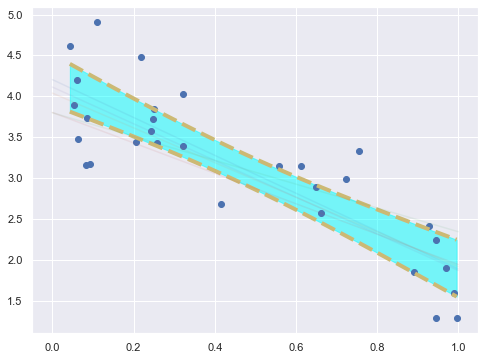

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, Y, "o", label="data")
#ax.plot(X_new[:,1], DF_fit_fitted_new, "r--.", label="OLS", lw = 4)
ax.plot(X_new[:,1], DF0_fit_confBand_low, "y--", lw = 4)
ax.plot(X_new[:,1], DF0_fit_confBand_high, "y--", lw = 4)
ax.fill_between(X_new[:,1], 
                y1 = DF0_fit_confBand_low, 
                y2 = DF0_fit_confBand_high, 
                color='cyan', alpha = 0.5) # para pintar de color entre ambas lineas que has calculado.

# Now let us fit a regression line for each sample and plot the result.
palette2 = iter(sns.color_palette(palette="deep", n_colors=N))
for sample in range(N):
    # select the sample
    DFs = DF.loc[sampleId == sample, :] 
    Xs = DFs.X
    Ys = DFs.Y
    # fit the regression line
    b0, b1 = getLM(Xs,Ys)
    print(sample, b0, b1,"\n", "--"*5)
    # plot the line
    Xnew = np.linspace(0, 1, num = 100)
    Ynew = b0 + b1 * Xnew

    plt.plot(Xnew, Ynew, color = next(palette2), alpha = 0.1)

### Prediction Bands

+ If you go back to to the example with $N$ samples of size $n$ each and you look not at the regression lines but at the points themselves you will notice that they also create a *band-shaped* region of the plane, certainly wider than the confidence band. That is of course to be expected: the prediction of the mean of a sample can be done with much more precision than the prediction of the individual values in that sample. But we can however predict that interval for each value of $X$ (using the normality assumption) and use Python to plot the resulting **prediction band**. 

**Example (continued):**

+ We already did all the hard work in the previous one, so here we can simply go the `summary_frame`, extract the information we need and plot the prediction band right away:

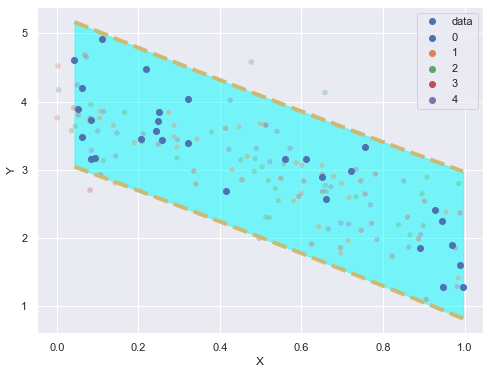

In [26]:

DF0_fit_predBand_low = DF0_fit.pred.summary_frame(alpha=0.05)["obs_ci_lower"]
DF0_fit_predBand_high = DF0_fit.pred.summary_frame(alpha=0.05)["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, Y, "o", label="data")
#ax.plot(X_new[:,1], DF_fit_fitted_new, "r--.", label="OLS", lw = 4)
ax.plot(X_new[:, 1], DF0_fit_predBand_low, "y--", lw = 4)
ax.plot(X_new[:, 1], DF0_fit_predBand_high, "y--", lw = 4)
ax.fill_between(X_new[:, 1], 
                y1 = DF0_fit_predBand_low, 
                y2 = DF0_fit_predBand_high, 
                color='cyan', alpha = 0.5)


showLegend = True
if(N > 10):
    showLegend = False
sns.scatterplot(data = DF, x = DF.X, y = DF.Y, hue = sampleId, 
                palette="deep", alpha = 0.3, legend= showLegend)

plt.show()

# Diagnosis for the Simple Linear Regression Model

+ If we are going to use the linear regresion model reliably, we need to check that the underlying population meets the requirements expressed as the hypothesis of the model. 

+ The first condition is really essential in many cases: use the plots to visually check the fit. If any unexpected pattern appears in the plot, then we should suspect that some unaccounted for phenomenon is happening.

+ But the formal hypothesis of the linear model 
$$Y = \beta_0 + \beta_1 X + \epsilon$$ 
refer to the erro variable $\epsilon$. The "conditional-on-$X$" distributions of this variable  are asumed to be *independent*, *normal*, with mean 0 and with a  *common variance $\sigma^2$*. And since out estimator of the conditional value of $\epsilon$ for $X = X_i$ is the residual $e_i$, we turn to the residuals when we try to check if the data suggests any departure from those hypothesis.

+ The usual way to do this is through a series of **residual diagnostic plots**. In each of these diagnostic plots we look for specific patterns to check for potential problems with the data.

+ We will use a Python script called `Linear_Reg_Diagnostic.py` with code [from the statsmodels web site]( https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html). Make sure to run the following cell before proceeding further, and feel free to examine the code in that file and the accompanying statsmodel documentation. 

In [27]:
%run ./code/Linear_Reg_Diagnostic.py

+ Below we will examine one by one the most frequently used types of diagnostic plots. We will use the data from our running example to illustrate the use of these plots.

**Example.**

+ To generate these plots run this code for your `fit` object. In this case, for `DF0_fit`. Then we can generate each plot as we will show below.

In [28]:
DF0_fit_diagnose = Linear_Reg_Diagnostic(DF0_fit)

### The Residual vs Fitted plot.

+ In this plot we are examining the hypothesis that the residuals are independent and specifically we are trying to detect if any pattern becomes apparent when we plot the residuals against the fitted values. If any such pattern appears it could be a symptom of t a failure in one of the hypothesis. For example a common problem that could arise here is the presence of a wedge pattern such as this one:
![](./fig/07-ResidualVsFitted_Wedge.png)
  The blue points were not present in the original plot, we added them manually to emphasize the pattern. Such wedge pattern indicates that the variance of the data is changing with the value of $X$, violating the hypothesis of homogeneous variance. This is a serious problem for any linear regression model.
  

**Example:**  

+ To get the residual vs fitted plot for our `DF0` example run this code:

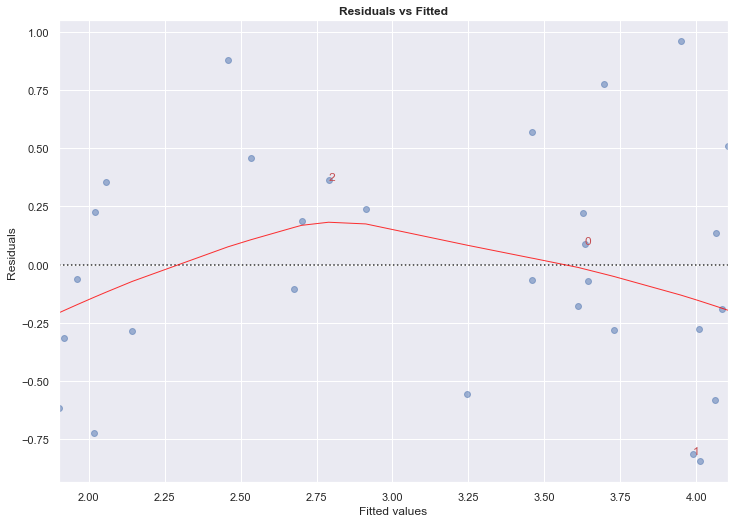

In [60]:
DF0_fit_diagnose.residual_plot()
plt.show()

+ As you can see, no pattern appears. The residuals seem to follow a homogenous random vertical distribution all across the horizontal axis. The red line visually illustrates that pattern, and so we expect to see a mostly flat red line in this plot as a good symptom for our modeling assumptions.

### The Residual QQ-plot

+ We already met QQ plots when we were discussing how to check normality from a sample. In this case we apply that same idea to the residuals of the fit. Since the conditional distributions of the error variables are all independent $N(0, \sigma)$ variables, when we plot them together they should look like a sample from a single normal variable (in fact $N(0, \sigma)$).

**Example:**  

+ We run this code to get the residual QQ plot for the `DF0` example:

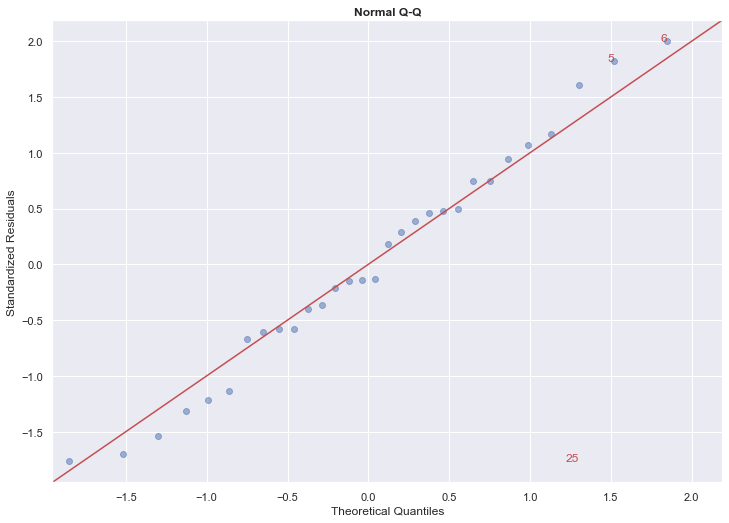

In [61]:
DF0_fit_diagnose.qq_plot()
plt.show()

+ The plot does look normal enough to pass the visual test. There is some noise at both ends of the range, but that is to be expected in most samples (keep in mind that this sample comes from a population that *does* verify all the hypothesis of the linear model).

### The Scale-Location Plot

+ This plot of standarized residuals vs fitted values often complements and reinforces the information provided by the first one, specifically in terms of checking the hypothesis of homomgeneous variance. The ideal shape for this plot would again be a vertically random distribution of the points across the horizontal range, with a mostly horizontal red line. 

**Example:**  

+ In the `DF0` example:

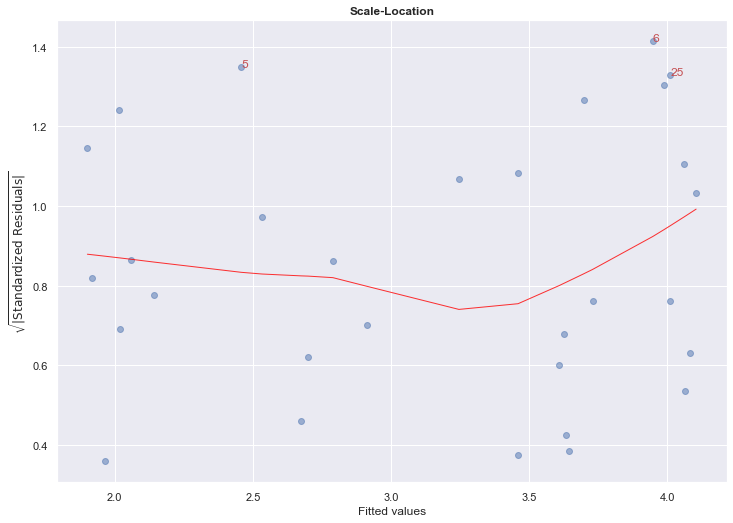

In [62]:
DF0_fit_diagnose.scale_location_plot()
plt.show()

+ We see again that the red line moderately deviates from the ideal pattern, but not nearly enough to make us question the assumptions of the model.

### The Residual vs Leverage Plot

+ The last plot of the series uses the notion of leverage, so we will first introduce the idea and then return to it.

### Measures of Influence: Leverage and Hatvalues

+ Sometimes a point $(x_i,y_i)$  in the sample has too much of an impact on the resulting position of the regression line. In such cases we say that $(x_i,y_i)$ is an *influential point* in our sample. This situation contains many common ingredients with the outlier problem, but the presence of two variables linked throught the regression line makes things a bit more complicated. 

+ You can thnk of the regression line as a seesaw (Spanish: *balancín*) balanced at $(\bar x, \bar y)$. There are then two ways in which a point can exert a big influence on the line:  

  1. The point may have a very large $x$ coordinate, with a lot of *leverage* (Spanish: palanca). Point $A$ in the figurehas this property (the figure shows the regression lines with and without $A$). In this case the $x$ coordinate is also an outlier in $X$.
![](./fig/06-PuntosInfluyentesRegresion.png)
  2. Even with a non-outlier value of the $x$ coordinate, the point may have an exceptionally large residual that would give it a large influence, as if a heavy person was sitting in the seesaw. You may use [this link to visually explore these ideas](https://www.geogebra.org/m/e6f2qgxf) 
 
+ There are several ways to turn these ideas into a quantitative measure of the influence of a point. One of the most widely used techniques is the method of **hat-values**. These values are computed from the residuals of the linear fit (one per each residual). And the following rule of thumb applies: a **point is considered influential** if its hat value is bigger than $4/n$ where $n$ is the sample size.Let us see how to check this condition in Python.

**Example** In the following example we first create a DataFrame where the last point is bound to be influential, because its size is much bigger than the rest of the points.

In [63]:
rng = np.random.default_rng(2022)
XU = np.concatenate((rng.normal(size = 10), np.array([20])))
XU = XU[:, np.newaxis]
XU_1 = sm.add_constant(XU)

YU = np.concatenate((rng.normal(size = 10), np.array([20])))
print(XU.transpose()[0, 6:], YU[6:])

[-2.47541091 -0.36716256  0.59226504 -2.9312485  20.        ] [ 0.49681204  1.01997171 -0.88286937 -1.33132135 20.        ]


+ We printed the last values both for X and Y so that you can check that the last one is much bigger. Now we obtain the hat values:

In [64]:
model_XYU = sm.OLS(YU, XU_1)
XYU_fit = model_XYU.fit()
XYU_influence = XYU_fit.get_influence()
XYU_hatValues = XYU_influence.hat_matrix_diag

+ And we check the condition:

In [65]:
any(XYU_hatValues > 4 / len(YU))
XYU_hatValues > 4 / len(YU)

array([False, False, False, False, False, False, False, False, False,
       False,  True])

+ As expected, the last value is flagged as being influential.

+ **Exercise (S07-005):** look for possible influential points in the `DF0` example.

In [ ]:
# %load ./code/S07-005.py
#S07-005
DF0_fit_influence = DF0_fit.get_influence()
DF0_hatValues = DF0_fit_influence.hat_matrix_diag
any(DF0_hatValues > 4 / n)

### Cook's Distance as a Measure of Leverage

+ One of the ways in which a point may become influential in a linear model is by having a big leverage, as we discussed before. Cook's distance is a quantitative measure of levearge and it is often included in the diagnostic plots of the linear model. In this kind of plot we look for any value with a large value of the Cook's distance, as this may be an indication of this point being influential. The diagnsotic plots includes some level curves of the Cook's distance and visual aids to identify possibly problematic sample data.

**Example:**  

+ In the `DF0` example the residual vs leverage plot looks is obtained and looks like this:

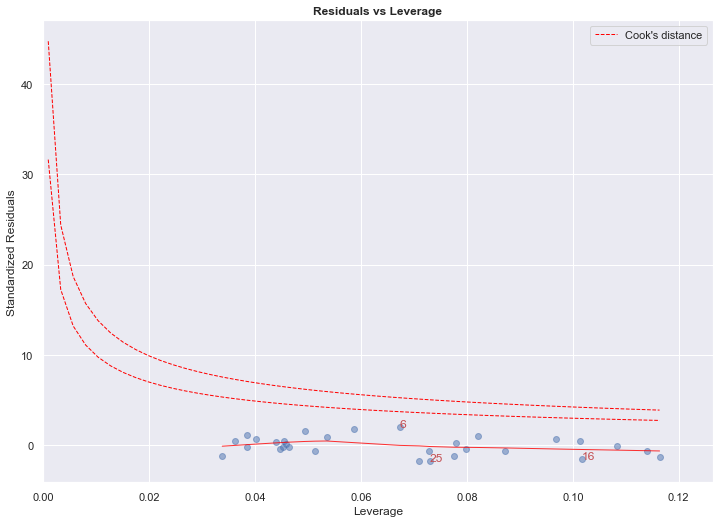

In [36]:
DF0_fit_diagnose.leverage_plot()
plt.show()

+ The two *hyperbolic- looking* curves are level curves of Cook's distance. And in this case we can see that there are no points that cross those curves, that can be considered thresholds of influence. 

+ If you ever find that your data contains influential points you should proceed similarly as what we did for outliers. That is, you should fit the model with and without those influential points, to really understand how deeply is the model being affected by them.

# Beyond the Basic Linear Model

### Linear Model for Curve-Shaped Data

+ The basic linear model that wehave been using until now is aimed at modeling a pattern in our data that looks like a *straight line*. But th e same method can be easily extended to situations in which the dependance of the data looks like a different curve, e.g. like a quadratic curve. Let us see an example

**Example:** The data in the [07_simple_linear_regression_02.csv](07_simple_linear_regression_02.csv) file resulted in a scatterplot where a parabolic pattern became apparent:

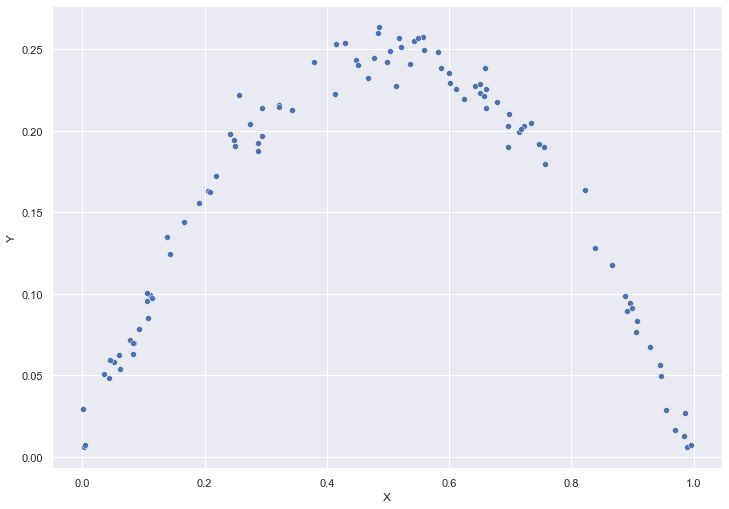

In [37]:
S2 = pd.read_csv("./data/07_simple_linear_regression_02.csv")
sns.scatterplot(x = S2.X, y = S2.Y)
plt.show()

+ We already discussed that fitting a straight regression line was a bad idea, resulting in turn in a bad *goodness of fit* measure. But we can put a remedy to this by simply adding a new parameter to the equation of the model to allow it to depend on the square of the variable:
$$
\quad\\
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon
\quad\\
$$
keeping the assumptions about $\epsilon$ unchanged. It turns out that the mathematical procedure for the fit of such model is very similar to the case of the staright line, and so is the Python code, with minimal adjustments. We just need to add a column to the data with the square of $X$

In [38]:
S2["X2"] = S2.X**2
print(S2.head())

          X         Y        X2
0  0.247426  0.194045  0.061220
1  0.092990  0.078447  0.008647
2  0.611763  0.225407  0.374254
3  0.060662  0.062402  0.003680
4  0.661033  0.225489  0.436965


+ And then we proceed to the *fit-as-usual* routine with `statsmodels`:

In [39]:
S2_fit = sm.OLS(S2.Y, sm.add_constant(S2[["X", "X2"]])).fit()
S2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3488.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.52e-91
Time:                        18:38:21   Log-Likelihood:                 325.05
No. Observations:                 100   AIC:                            -644.1
Df Residuals:                      97   BIC:                            -636.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.003      2.135      0.035       0.000       0.010
X              0.9769      0.012     81.869      0.000       0.953       1.001
X2            -0.9827      0.012    -83.305      0.000      -1.006      -0.959
==============================================================================
Omnibus:                        2.044   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.456
Skew:                           0.238   Prob(JB):                        0.483
Kurtosis:                       3.352   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ As you can see the summary table looks very familiar, the only difference now being that we have an additional line for the coefficient `X2` corresponding to the estimate of the new parameter $\beta_2$. But all the rest is really similar to what we have seen before. And so is predicting new values. We will show this by plotting the fitted curve, which in tis case is of course a parabola. First we create a grid of points across the $X$ range and compute their squares:

In [40]:
X_new = np.linspace(S2.X.min(), S2.X.max(), 100)
newData = pd.DataFrame({'X':X_new, 'X2':X_new**2})
newData = sm.add_constant(newData)
newData.head()

,const,X,X2
0,1.0,0.000522,2.723250e-07
1,1.0,0.010578,1.118954e-04
2,1.0,0.020634,4.257733e-04
3,1.0,0.030690,9.419061e-04
4,1.0,0.040747,1.660294e-03


+ And now we can predict the $Y$ values from that grid and plot the resulting $(X, Y)$ points:

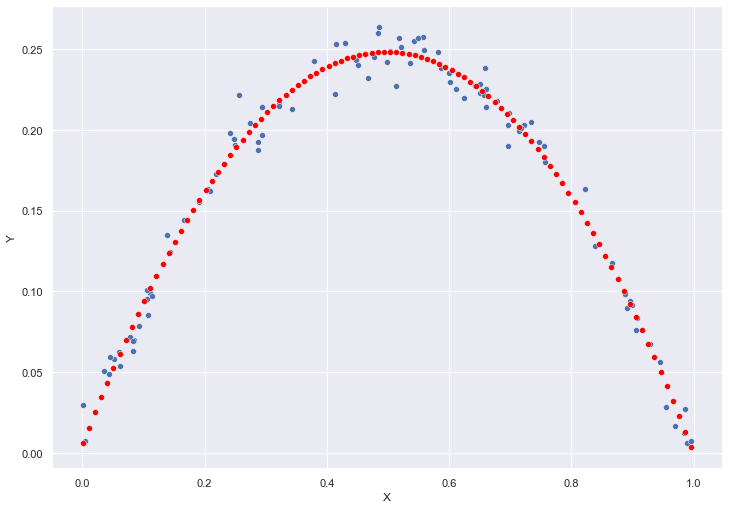

In [41]:
S2_pred = S2_fit.get_prediction(newData)
S2_fitted_new = S2_pred.summary_frame(alpha=0.05)["mean"]
S2_pred.summary_frame()
sns.scatterplot(x = S2.X, y = S2.Y)
sns.scatterplot(x = newData['X'], y = S2_pred.summary_frame()["mean"], color ="red")
plt.show()

+ Even from the visual point of view is already apparent that this model offers a much better fit to the data.


### Very important note:

+ Note that even with the pressence of a quadratic term in $X$ and even though the curve in the scatter plot is not a straight line we keep calling this  
$$
\quad\\
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon
\quad\\
$$
a **linear model because it is linear in the parameters $\beta_i$**.

### Multivariable Linear Models

+ After seeing the quadratic example we are now in a good position to generalize that idea to include models that depend on more than one variable. That is, instead of thinking about the relation between $X$ and $Y$ we extend this to two or more explanatory variables, considering models such as
$$
\quad\\
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
\quad\\
$$

where $X_1, X_2$ are two variables in out data set, and the assumptions about $\epsilon$ remain the same. Again, the theory and Python code all look familiar. 

**Example:** let us fit a linear model in the `framingham` data set to study the possible relation between the `totChol` variable and the `age` and `BMI` variables, considering both as predictors. That is we think of a linear model
$$
\quad\\
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
\quad\\
$$
where $Y = $ `totChol`, $X_1 = $ `age` and $X_2 = $ `BMI`. The Python code is extremely similar to the example that we have just seen. First we load the data and remove the missing values (as they would cause fitting errors downstream):

In [42]:
framingham_url = "https://raw.githubusercontent.com/mbdfmad/fmad2122/main/data/framingham.csv"
framingham = pd.read_csv(framingham_url)
fram = framingham # shorten name
fram.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [43]:
fram.dropna(inplace=True)
fram.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

+ And now we simply fit the model. This time we are simplifying this step by condensing several operations in one line of code:

In [44]:
fram_fit = sm.OLS(fram.totChol, sm.add_constant(fram[["age", "BMI"]])).fit()
fram_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                totChol   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     157.1
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           3.38e-66
Time:                        18:38:22   Log-Likelihood:                -18890.
No. Observations:                3658   AIC:                         3.779e+04
Df Residuals:                    3655   BIC:                         3.780e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.4059      5.680     25.954      0.000     136.270     158.541
age            1.3208      0.083     16.004      0.000       1.159       1.483
BMI            0.9305      0.174      5.354      0.000       0.590       1.271
==============================================================================
Omnibus:                      466.406   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1137.398
Skew:                           0.731   Prob(JB):                    1.04e-247
Kurtosis:                       5.308   Cond. No.                         458.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ You can see that we have estimations for the values (and also in terms of confidence intervals) for the parameters $\beta_i$ of the model, for $i = 0, 1, 2$. 


+ Prediction is as easy as in the previous examples, but this time we are going to use to illustrate the meaning of the parameters of the model.

#### Interpreting the Parameters of a Multivariable Linear Regression Model

+ In a multivariable linear model such as this one: 
$$
\quad\\
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
\quad\\
$$
the value of e.g. $\beta_1$, the coefficient of $X_1$, represents **the change in $Y$ per unit change in $X_1$ while keeping $X_2$ constant.** Let us illustrate this in an example.

**Example:** for the previous framingham data  model (usually we would represent such a model as `totChol` $\sim$ `age` + `BMI`) we will generate a new data set for prediction in which:
  + we increase the value of `BMI` unit by unit all along the range  of `BMI` in the data,
  + while we keep `age` fixed at a value, in this example 49.

In [45]:
BMI_new = np.arange(fram.BMI.min(), fram.BMI.max(), 1)
AGE_new = np.repeat(49, len(BMI_new))
newData = pd.DataFrame({'BMI':BMI_new, 'AGE':AGE_new})
newData.head()

,BMI,AGE
0,15.54,49
1,16.54,49
2,17.54,49
3,18.54,49
4,19.54,49


+ Now let us get the predicted `totChol` values for that data. As a technical note, here we need to use the `has_constant = TRUE` option to make this work, precisely because we are holding one of the variables constant and that can potentially cause problems for the `add_constant` function: 

In [46]:
newData = sm.add_constant(newData, has_constant='add')
newData.head()

,const,BMI,AGE
0,1.0,15.54,49
1,1.0,16.54,49
2,1.0,17.54,49
3,1.0,18.54,49
4,1.0,19.54,49


+ And now for the predictions as usual:

In [47]:
fram_pred = fram_fit.get_prediction(newData)

+ We will now use `diff` to obtain the difference between each one of these predictions and the previous one (except for the first, of course), This difference is the *change in totChol per unit change in BMI, while age = 49 remains fixed*:

In [48]:
fram_pred.summary_frame()['mean'].diff().head()

0         NaN
1    1.320837
2    1.320837
3    1.320837
4    1.320837
Name: mean, dtype: float64

+ As you can see the difference is constant (because of the linear nature of this model) and it equals precisely the estimate $b_1$ of the model parameter $\beta_1$, as can be seen in the summary table above or directly with:

In [49]:
fram_fit.params

const    147.405868
age        1.320837
BMI        0.930537
dtype: float64

+ We have used the value 49 for the age, but you should try to replace it with any (in-sample) value and check the result.

+ **Exercise (S07-006):** using the data in the `movies` data set (see Session 02) fit a linear model to predict the `Profitability` of the movie from its `Audience Score` and `Rotten Tomatoes` ratings. You may need to change the default variable names in the table since they contain the non alphabetical character %. Use an easy to identify pandas function to rename the columns. After fitting the model find the increase in Profitability per unit change in Audience Score, while keeping the Rotten Tomatoes rating fixed at a constant value.

In [50]:

# %load ./code/S07-006.py

# HASTA AQUI
### Anova

+ For our final example of the wide range of applications of the linear model we will consider the case where the explanatory variable in the model is not a numerical variable, but a factor, in a relation of the type $N\sim F$. We will also illustrate this by means of an example:

**Example:**
+  We will load the classical iris data set, which has been in use for Statistical demo procedures for a long time now. The data is stored in a csv file in the data folder of the `fmad2223`  repository folder.

In [51]:
iris = pd.read_csv("./data/iris.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


+ As you can see it has four numerical columns, related to morphological characteristic of certain species of iris flowers, while the last column identifies the Species for that particular specimen. The frequency table for `Species` is: 

In [52]:
iris.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

+ And we can apply the `describe` method to explore the numerical variables (in particular note that there are no missing data) 

In [53]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


+ We are going to fit a model to study the relation 
$$\text{Sepal.Length }\sim\text{ Species}$$
Since the `Sepal.Length` variable name contains a dot, we first change it to make it comply with Python requirements for variable names:

In [54]:
iris.rename(columns= {'Sepal.Length':'SepalLength'},inplace=True)

+ The next step is the introduction of the so called *dummy* variables, to represent with a numerical coding the three levels of `Species`. Let us see how this works. All the `setosa` observations get code `[1, 0, 0]`, all the `versicolor` get `[0, 1, 0]` and all the `virginica` get `[0, 0, 1]`. Here we illustrate the transition from `setosa` to `versicolor` in the dummy variables encoding of `Species`.

In [55]:
Species_dummies = pd.get_dummies(iris.Species).values
Species_dummies[45:55, :]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

+ Now a very important property of these *dummy variables* is that their values are not independent, because once you know the value of two of them, you already know the third. This lack of independence is a potential cause for problems in teh linear model fit, and so we remove one of them. Usually the first one, associated to the first level (in this case, `setosa`) which is then referred to as the **reference level**.

In [56]:
Species_dummies = Species_dummies[:, 1:]

+ We are now ready to use these two remaining dummy variables as predictors or explanatory variables for our linear model. The mechanic of the fit will look familiar:

In [57]:
X = Species_dummies
X = sm.add_constant(X)
iris_fit = sm.OLS(iris.SepalLength, X).fit()
iris_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SepalLength   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.67e-31
Time:                        18:38:22   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0060      0.073     68.762      0.000       4.862       5.150
x1             0.9300      0.103      9.033      0.000       0.727       1.133
x2             1.5820      0.103     15.366      0.000       1.379       1.785
==============================================================================
Omnibus:                        1.188   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.785
Skew:                           0.119   Prob(JB):                        0.675
Kurtosis:                       3.263   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ A model like this one is an example of the classical *One-way Anova* (one way meaning one factor):
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon, \qquad \text{ with }\quad \epsilon\sim N(0, \sigma)
$$
and $X_1, X_2$ being the reamining dummy variables.

+ You can see that the summary table for the fit contains three parameters for the model. What is their interpretation? 
  + The intercept is the mean of $Y$ = `SepalLength` of the reference level.
  + The remaining two parameters represent the difference between the mean of `SepalLength` for that level and the mean for the reference level. 
![](./fig/07-AnovaBoxplots.png)  
Let us check this:

In [58]:
sepalLength_groupMeans = iris.groupby("Species")["SepalLength"].mean()
print(sepalLength_groupMeans)

Species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: SepalLength, dtype: float64


In [59]:
print(sepalLength_groupMeans[0], 
      sepalLength_groupMeans[1] - sepalLength_groupMeans[0],
      sepalLength_groupMeans[2] - sepalLength_groupMeans[0])

5.006 0.9299999999999997 1.581999999999999


+ The nice thing about this is that we also have inference results about the difference of those means. For example, we have a p-value to tell us if the means of `SepalLength` for `Species = setosa`,  can be considered to be significantly different from that for  `Species = virginia` and `Species = versicolor`. To be precise, the null hypothesis being tested here is:
$$
\quad\\
H_0 = \{\mu_1 = \mu_2 = \mu_3\}
\quad\\
$$
and in particular the alternative is **not** all the three means are different, but *there are two of them that are different*. But if we reject that null, we can not yet identify a significantly different pair, because that brings ut back to the problem of multiple testing, and we know that this requires extra work that we will not make here.